# GeoPandas How-To

In [23]:
import geopandas
import matplotlib.pyplot as plt

## 1. How do a read various kinds of files (shapefiles, geopackages, geojsons, locally and from the web).

In [20]:
# To read files, use the read_file function.
# The data I am reading is polygons of all the buildings in Arlington County, VA

df = geopandas.read_file("data/Building_poly.shp")

In [5]:
df.head()

,OBJECTID,VOTER,STRTMAP,SCHOOL,FIRESTATIO,COUNTYOFFI,LIBRARY,HOSPITAL,GIS_ID,GLUP,GeoSyncDat,SHAPE_Leng,SHAPE_Area,geometry
0,46880,0,0,None,0,NaN,NaN,NaN,35755,0,2022-10-27,142.308861,1100.544528,"POLYGON ((11871400.900 7019631.070, 11871382.1..."
1,46881,0,0,None,0,NaN,NaN,NaN,35756,0,2022-10-27,170.887676,1672.196931,"POLYGON ((11875766.750 7019450.120, 11875750.7..."
2,46882,0,0,None,0,NaN,NaN,NaN,35760,0,2022-10-27,156.446910,1249.800405,"POLYGON ((11869914.930 7019349.050, 11869886.9..."
3,46883,0,0,None,0,NaN,NaN,NaN,35762,0,2022-10-27,153.675255,1298.053656,"POLYGON ((11869976.290 7019344.410, 11869948.9..."
4,46884,0,0,None,0,NaN,NaN,NaN,35763,0,2022-10-27,178.334665,1473.279169,"POLYGON ((11869964.160 7018039.540, 11869942.3..."


## 2. How do I calculate a field?

In [7]:
df.columns

Index(['OBJECTID', 'VOTER', 'STRTMAP', 'SCHOOL', 'FIRESTATIO', 'COUNTYOFFI',
       'LIBRARY', 'HOSPITAL', 'GIS_ID', 'GLUP', 'GeoSyncDat', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry'],
      dtype='object')

In [8]:
# To calculate a new field, use selectors and math operators.

df['county_buildings'] = df['COUNTYOFFI'] + df['LIBRARY'] + df['HOSPITAL']

In [9]:
df['county_buildings']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
46874   NaN
46875   NaN
46876   NaN
46877   NaN
46878   NaN
Name: county_buildings, Length: 46879, dtype: float64

## 3. How do you save the data?

In [11]:
# You can export the data using the to_file function.

df.to_file("data/export.shp")

C:\Users\drewt\AppData\Local\Temp\ipykernel_56104\3694045143.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file("data/export.shp")


In [12]:
# We can ignore this warning above. It just states that any column names longer that 10 characters will be truncated.

## 4. How can you export to a CSV? To an Excel file?

In [14]:
# To export to a CSV file, use the to_csv function.

df.to_csv('data/ArlCSV.csv')

# To export to an Excel spreadsheet, use the to_excel function.

df.to_excel('data/ArlXLSX.xlsx')

## 5. How do I take a CSV that includes latitude and longitude, and turn it into a GeoDataFrame?

In [85]:
# I have downloaded a CSV of address points in Arlington County. This CSV includes X and Y values. While these are not latitude
# and logitude, it will still demonstrate the process.

address_df = geopandas.read_file('data/Address_Points.csv')

In [86]:
address_df.head()

,X,Y,OBJECTID,STNUM,STCODE,STRTDIR,STRTDIRPREFIX,STRTNAME,STRTTYPE,STRTDIRSUFFIX,FULL_ADDRESS,STATUS,UNITCOUNT,STNAME,UNIT,UPDATE_DATE,ZIP5,GISID,GeoSyncDate,geometry
0,11884368.819946,7004361.83001098,561062,1,NFENST,N,N,FENWICK,ST,,1 N FENWICK ST,VERIFIED,1,N FENWICK ST,,2006/08/23 00:00:00,22201,101,2023/03/08 19:44:29,None
1,11881173.9900496,7003350.08990848,561063,1,NGLERD,N,N,GLEBE,RD,,1 N GLEBE RD,VERIFIED,1,N GLEBE RD,,2006/08/23 00:00:00,22203,102,2023/03/08 19:44:29,None
2,11875030.5800923,7001718.2401538,561064,1,NGRAST,N,N,GRANADA,ST,,1 N GRANADA ST,VERIFIED,1,N GRANADA ST,,2006/08/23 00:00:00,22203,103,2023/03/08 19:44:29,None
3,11872240.0800959,7001583.37985922,561065,1,NMADST,N,N,MADISON,ST,,1 N MADISON ST,VERIFIED,1,N MADISON ST,,2006/08/23 00:00:00,22203,104,2023/03/08 19:44:29,None
4,11871865.9400961,7001569.4199134,561066,1,NMANST,N,N,MANCHESTER,ST,,1 N MANCHESTER ST,VERIFIED,1,N MANCHESTER ST,,2006/08/23 00:00:00,22203,105,2023/03/08 19:44:29,None


In [87]:
gdf = geopandas.GeoDataFrame(address_df, geometry=geopandas.points_from_xy(address_df.Y, address_df.X))

In [88]:
address_df.head()

,X,Y,OBJECTID,STNUM,STCODE,STRTDIR,STRTDIRPREFIX,STRTNAME,STRTTYPE,STRTDIRSUFFIX,FULL_ADDRESS,STATUS,UNITCOUNT,STNAME,UNIT,UPDATE_DATE,ZIP5,GISID,GeoSyncDate,geometry
0,11884368.819946,7004361.83001098,561062,1,NFENST,N,N,FENWICK,ST,,1 N FENWICK ST,VERIFIED,1,N FENWICK ST,,2006/08/23 00:00:00,22201,101,2023/03/08 19:44:29,POINT (7004361.830 11884368.820)
1,11881173.9900496,7003350.08990848,561063,1,NGLERD,N,N,GLEBE,RD,,1 N GLEBE RD,VERIFIED,1,N GLEBE RD,,2006/08/23 00:00:00,22203,102,2023/03/08 19:44:29,POINT (7003350.090 11881173.990)
2,11875030.5800923,7001718.2401538,561064,1,NGRAST,N,N,GRANADA,ST,,1 N GRANADA ST,VERIFIED,1,N GRANADA ST,,2006/08/23 00:00:00,22203,103,2023/03/08 19:44:29,POINT (7001718.240 11875030.580)
3,11872240.0800959,7001583.37985922,561065,1,NMADST,N,N,MADISON,ST,,1 N MADISON ST,VERIFIED,1,N MADISON ST,,2006/08/23 00:00:00,22203,104,2023/03/08 19:44:29,POINT (7001583.380 11872240.080)
4,11871865.9400961,7001569.4199134,561066,1,NMANST,N,N,MANCHESTER,ST,,1 N MANCHESTER ST,VERIFIED,1,N MANCHESTER ST,,2006/08/23 00:00:00,22203,105,2023/03/08 19:44:29,POINT (7001569.420 11871865.940)


## 6. How do I join data with geopandas?

In [2]:
# Here, I will join the addresses dataframe to a zip codes dataframe 

zip_df = geopandas.read_file('data/Zipcode_poly.shp')
zip_df.head()

,OBJECTID,ZIP5DIG,Mailing_Ci,SHAPE_Leng,SHAPE_Area,geometry
0,1,22101,None,5472.941999,1.665006e+06,"POLYGON ((11874790.000 7025535.500, 11874973.0..."
1,2,22043,None,818.524982,1.343329e+04,"POLYGON ((11863766.025 7014159.035, 11863798.0..."
2,3,22302,None,482.517678,7.088553e+03,"POLYGON ((11878190.844 6994221.052, 11878115.0..."
3,4,22044,None,295.037751,4.805313e+03,"POLYGON ((11871452.514 7000753.494, 11871449.0..."
4,5,20301,None,4782.603172,1.489293e+06,"POLYGON ((11894390.010 7004182.490, 11894411.0..."


In [11]:
#Since the addresses dataframe has it's zipcodes stored as objects instead of integers, I convert them to integers here.
#The zipcodes table already has them stored as integers, so I can leave it alone for now.

address_df['ZIP5']=address_df['ZIP5'].astype(int)

In [19]:
#To join data, you should use the "merge" function.

merge_df = address_df.merge(zip_df, how="outer", left_on="ZIP5", right_on="ZIP5DIG")
merge_df.head()

,X,Y,OBJECTID_x,STNUM,STCODE,STRTDIR,STRTDIRPREFIX,STRTNAME,STRTTYPE,STRTDIRSUFFIX,...,ZIP5,GISID,GeoSyncDate,geometry_x,OBJECTID_y,ZIP5DIG,Mailing_Ci,SHAPE_Leng,SHAPE_Area,geometry_y
0,11884368.819946,7004361.83001098,561062,1,NFENST,N,N,FENWICK,ST,,...,22201.0,101,2023/03/08 19:44:29,None,50,22201,None,53322.400754,6.447627e+07,"POLYGON ((11886982.280 7009275.670, 11886897.6..."
1,11885171.1762809,7005142.77562755,561082,100,NBEDST,N,N,BEDFORD,ST,,...,22201.0,121,2023/03/08 19:44:29,None,50,22201,None,53322.400754,6.447627e+07,"POLYGON ((11886982.280 7009275.670, 11886897.6..."
2,11883058.5801124,7004503.43012148,561089,100,NIRVST,N,N,IRVING,ST,,...,22201.0,128,2023/03/08 19:44:29,None,50,22201,None,53322.400754,6.447627e+07,"POLYGON ((11886982.280 7009275.670, 11886897.6..."
3,11882574.8399381,7004322.79990532,561090,100,NJACST,N,N,JACKSON,ST,,...,22201.0,129,2023/03/08 19:44:29,None,50,22201,None,53322.400754,6.447627e+07,"POLYGON ((11886982.280 7009275.670, 11886897.6..."
4,11885607.9700267,7005517.53012739,561096,100,NWAYST,N,N,WAYNE,ST,,...,22201.0,135,2023/03/08 19:44:29,None,50,22201,None,53322.400754,6.447627e+07,"POLYGON ((11886982.280 7009275.670, 11886897.6..."


## 7. How can I create plots of my data (points, lines, and polygons)?

(11858980.840128204, 11902656.73817649, 6985644.264887121, 7028147.715050656)

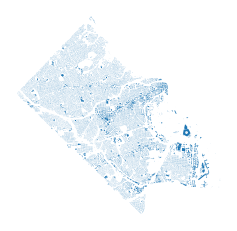

In [24]:
# You can plot data using the plot function.
# Also, I will remove the axis of this plot using matplotlib's axis function.

df.plot()
plt.axis('off')

## 8. How do I save those plots to disk?

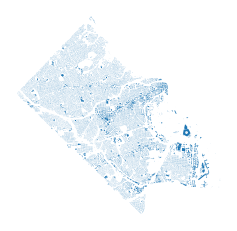

In [26]:
# To save plots, you can use matplotlib's savefig function

df.plot()
plt.axis('off')
plt.savefig('ArlBuildings.jpg')

## 9. How can I apply a buffer in geopandas?

(-8591562.938945508, -8574402.608014086, 4696225.368077002, 4713030.193614464)

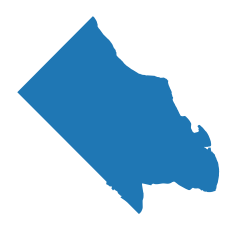

In [43]:
# Here is a shapefile of Arlington County

county_df = geopandas.read_file("data/ArlCounty.shp")
county_df.plot()
plt.axis('off')

(-8592112.938847719, -8573852.609919732, 4695675.402360808, 4713580.116859885)

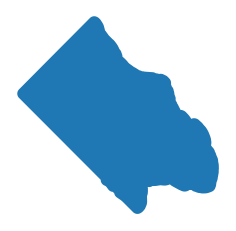

In [47]:
# You can apply a buffer using the buffer function
county_buffer = county_df.buffer(500)
county_buffer.plot()
plt.axis('off')

## 10. How can I use both classic Pandas indexing (.loc and .iloc) as well as spatial indexing (.cx) to find data?

In [79]:
# You can use the loc function to locate objects within a database by a conditional statement

result_df = df.loc[df["COUNTYOFFI"] > 0]
result_df.head()

,OBJECTID,VOTER,STRTMAP,SCHOOL,FIRESTATIO,COUNTYOFFI,LIBRARY,HOSPITAL,GIS_ID,GLUP,GeoSyncDat,SHAPE_Leng,SHAPE_Area,geometry
8815,55695,0,0,None,0,1.0,NaN,NaN,23942,1,2022-10-27,611.338805,11405.092464,"POLYGON ((11873396.310 7010788.540, 11873402.9..."
9118,55998,0,0,None,0,1.0,NaN,NaN,24191,1,2022-10-27,215.059090,2539.506921,"POLYGON ((11873373.450 7010609.500, 11873385.9..."
9184,56064,0,1,None,0,1.0,NaN,NaN,24290,1,2022-10-27,795.205898,31345.050391,"POLYGON ((11886035.300 7010508.550, 11886063.2..."
9262,56142,0,1,None,0,1.0,NaN,NaN,24369,1,2022-10-27,856.464834,31282.381625,"POLYGON ((11885444.310 7010466.900, 11885458.3..."
9456,56336,0,1,None,0,1.0,NaN,NaN,24748,1,2022-10-27,693.622352,26010.337659,"POLYGON ((11886139.180 7010337.800, 11886139.1..."


In [68]:
# You can use the iloc function to locate objects by index

address_df.iloc[-5:]

,X,Y,OBJECTID,STNUM,STCODE,STRTDIR,STRTDIRPREFIX,STRTNAME,STRTTYPE,STRTDIRSUFFIX,...,STATUS,UNITCOUNT,STNAME,UNIT,UPDATE_DATE,ZIP5,GISID,GeoSyncDate,geometry,ZIP5DIG
43759,11894601.8342568,7001065.70307305,604821,1051,SEADST,S,S,EADS,ST,,...,VERIFIED,1,S EADS ST,,2023/01/24 00:00:00,22207,44137,2023/03/08 19:44:35,None,22207
43760,11874351.4682616,7014556.48941164,604822,4704,N025ST,N,,25th,ST,N,...,VERIFIED,1,25TH ST N,,2023/02/09 00:00:00,22207,44138,2023/03/08 19:44:35,None,22207
43761,11888945.8626291,7013142.83639906,604823,1919,NNASST,N,N,NASH,ST,,...,VERIFIED,1,N NASH ST,,2023/02/13 00:00:00,22207,44139,2023/03/08 19:44:35,None,22207
43762,11876608.6907812,6997481.59573998,604824,5265,S009RD,S,,9th,RD,S,...,VERIFIED,1,9TH RD S,,2023/03/01 00:00:00,22207,44140,2023/03/08 19:44:35,None,22207
43763,11882936.7112616,6994218.73185889,604825,2345,SWALDR,S,S,WALTER REED,DR,,...,VERIFIED,1,S WALTER REED DR,,2023/03/07 00:00:00,22207,44141,2023/03/08 19:44:35,None,22207


In [101]:
# You can use the cx function to spatially index a dataset

zip_df = geopandas.read_file('data/Zipcode_poly.shp')
zip_df.cx[:, :0]

,OBJECTID,ZIP5DIG,Mailing_Ci,SHAPE_Leng,SHAPE_Area,geometry
52,53,22206,None,48679.562366,4.914100e+07,"POLYGON ((11888949.433 6996852.664, 11888982.4..."


## 11. Can you demonstrate a “group” operation with Pandas syntax? Can you do a spatial “group” using .dissolve?

In [105]:
# In pandas, you use a "groupby" function to perform a group operation

group_df = address_df.groupby("ZIP5")
group_df.first()

,X,Y,OBJECTID,STNUM,STCODE,STRTDIR,STRTDIRPREFIX,STRTNAME,STRTTYPE,STRTDIRSUFFIX,FULL_ADDRESS,STATUS,UNITCOUNT,STNAME,UNIT,UPDATE_DATE,GISID,GeoSyncDate,geometry
ZIP5,,,,,,,,,,,,,,,,,,,
20001,11894421.4369798,7003092.25052914,602256,1,_ROTRD,,,ROTARY,RD,,1 ROTARY RD,VERIFIED,1,ROTARY RD,,2008/09/25 00:00:00,43055,2023/03/08 19:44:35,POINT (7003092.251 11894421.437)
22041,11873983.0861243,6998234.77435173,603865,3382,_ARDCT,,,ARDLEY,CT,,3382 ARDLEY CT,VERIFIED,1,ARDLEY CT,,2019/12/18 00:00:00,43076,2023/03/08 19:44:35,POINT (6998234.774 11873983.086)
22046,11866051.1200329,7005997.70009881,561201,1004,NROOST,N,N,ROOSEVELT,ST,,1004 N ROOSEVELT ST,VERIFIED,1,N ROOSEVELT ST,,2015/04/17 00:00:00,38162,2023/03/08 19:44:29,POINT (7005997.700 11866051.120)
22101,11876234.6098365,7024708.68990773,562361,111,_CHARD,,,CHAIN BRIDGE,RD,,111 CHAIN BRIDGE RD,VERIFIED,1,CHAIN BRIDGE RD,,2006/08/23 00:00:00,38195,2023/03/08 19:44:29,POINT (7024708.690 11876234.610)
22201,11884368.819946,7004361.83001098,561062,1,NFENST,N,N,FENWICK,ST,,1 N FENWICK ST,VERIFIED,1,N FENWICK ST,,2006/08/23 00:00:00,101,2023/03/08 19:44:29,POINT (7004361.830 11884368.820)
22202,11891964.5600038,6998828.09009422,561124,1000,S016ST,S,,16th,ST,S,1000 16th ST S,VERIFIED,1,16TH ST S,,2006/08/23 00:00:00,163,2023/03/08 19:44:29,POINT (6998828.090 11891964.560)
22203,11881173.9900496,7003350.08990848,561063,1,NGLERD,N,N,GLEBE,RD,,1 N GLEBE RD,VERIFIED,1,N GLEBE RD,,2006/08/23 00:00:00,102,2023/03/08 19:44:29,POINT (7003350.090 11881173.990)
22204,11875651.9298995,7001466.88993473,561067,1,SEDIST,S,S,EDISON,ST,,1 S EDISON ST,VERIFIED,1,S EDISON ST,,2006/08/23 00:00:00,106,2023/03/08 19:44:29,POINT (7001466.890 11875651.930)
22205,11870942.1099228,7005337.87005365,561106,1000,NARLDR,N,N,ARLINGTON MILL,DR,,1000 N ARLINGTON MILL DR,VERIFIED,1,N ARLINGTON MILL DR,,2006/08/23 00:00:00,145,2023/03/08 19:44:29,POINT (7005337.870 11870942.110)


In [107]:
# To do this in GeoPandas, you can use the "dissolve" function, which joins their geometry into a single type.

dissolve_df = address_df.dissolve("ZIP5")
dissolve_df.head()

,geometry,X,Y,OBJECTID,STNUM,STCODE,STRTDIR,STRTDIRPREFIX,STRTNAME,STRTTYPE,STRTDIRSUFFIX,FULL_ADDRESS,STATUS,UNITCOUNT,STNAME,UNIT,UPDATE_DATE,GISID,GeoSyncDate
ZIP5,,,,,,,,,,,,,,,,,,,
20001,"MULTIPOINT (6992803.607 11896986.067, 6992805....",11894421.4369798,7003092.25052914,602256,1,_ROTRD,,,ROTARY,RD,,1 ROTARY RD,VERIFIED,1,ROTARY RD,,2008/09/25 00:00:00,43055,2023/03/08 19:44:35
22041,"MULTIPOINT (6998234.774 11873983.086, 6998249....",11873983.0861243,6998234.77435173,603865,3382,_ARDCT,,,ARDLEY,CT,,3382 ARDLEY CT,VERIFIED,1,ARDLEY CT,,2019/12/18 00:00:00,43076,2023/03/08 19:44:35
22046,"MULTIPOINT (7005997.700 11866051.120, 7006164....",11866051.1200329,7005997.70009881,561201,1004,NROOST,N,N,ROOSEVELT,ST,,1004 N ROOSEVELT ST,VERIFIED,1,N ROOSEVELT ST,,2015/04/17 00:00:00,38162,2023/03/08 19:44:29
22101,"MULTIPOINT (7015675.381 11865201.308, 7019507....",11876234.6098365,7024708.68990773,562361,111,_CHARD,,,CHAIN BRIDGE,RD,,111 CHAIN BRIDGE RD,VERIFIED,1,CHAIN BRIDGE RD,,2006/08/23 00:00:00,38195,2023/03/08 19:44:29
22201,"MULTIPOINT (7003768.780 11882371.630, 7003809....",11884368.819946,7004361.83001098,561062,1,NFENST,N,N,FENWICK,ST,,1 N FENWICK ST,VERIFIED,1,N FENWICK ST,,2006/08/23 00:00:00,101,2023/03/08 19:44:29
